## importing Libraries

<h3>For More Details</h3>https://www.kaggle.com/aryarishabh/predicting-the-power-generated-using-mixed-model#Task-3---Data-preparation

In [1]:
import numpy as np
import pandas as pd

## importing libraries for visualisation

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (16,10)

import seaborn as sns
sns.set_style('whitegrid')

## Loading the DataSet

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head(10)

tracking_id             datetime  wind_speed(m/s)  \
0    WM_33725  2019-08-04 14:33:20        94.820023   
1      WM_698  2018-11-05 10:13:20       241.832734   
2    WM_39146  2019-09-14 14:03:20        95.484724   
3     WM_6757  2018-12-25 15:33:20       238.819424   
4    WM_21521  2019-05-04 03:13:20        10.722890   
5    WM_17873  2019-03-22 21:03:20        93.769973   
6    WM_19873  2019-04-17 18:33:20        16.026249   
7    WM_30330  2019-07-08 21:03:20        48.737826   
8    WM_26069  2019-06-07 17:53:20        47.081729   
9    WM_28915  2019-06-28 16:13:20       283.789329   

   atmospheric_temperature(°C)  shaft_temperature(°C)  blades_angle(°)  \
0                   -99.000000              41.723019        -0.903423   
1                    27.764785             -99.000000       -99.000000   
2                          NaN              41.855473        12.652763   
3                   -99.000000              45.443914        15.115323   
4                          NaN              41.981183         1.715696   
5                    30.326226              17.970619       -99.000000   
6                   -99.000000              44.072819        -0.196845   
7                    12.716815              43.217778       -99.000000   
8                   -99.000000             -33.607048       -99.000000   
9                    18.887932              41.691469        52.337026   

   gearbox_temperature(°C)  engine_temperature(°C)  motor_torque(N-m)  \
0                82.410573               42.523015        2563.124522   
1                44.104919               46.258870        2372.384119   
2                42.322098               42.878552        1657.169646   
3                44.759643               47.282101        2888.134079   
4               -17.616459               43.469852         781.695419   
5                43.816430               40.815795        2119.351653   
6                41.680583               43.384904         778.109985   
7               -48.405089               44.125843         980.988531   
8                43.055427               45.253628         957.580151   
9               -62.724362               41.881256        1042.086135   

   generator_temperature(°C)  ...  windmill_body_temperature(°C)  \
0                  76.665560  ...                            NaN   
1                  78.129803  ...                            NaN   
2                  67.654469  ...                      45.033197   
3                  95.389974  ...                      44.827154   
4                  37.423065  ...                     -99.000000   
5                  72.345126  ...                     101.378184   
6                  40.284018  ...                      43.008746   
7                  43.691867  ...                     -99.000000   
8                  41.609787  ...                      43.216062   
9                  65.280225  ...                     -99.000000   

   wind_direction(°)  resistance(ohm)  rotor_torque(N-m)  turbine_status  \
0         239.836388      2730.310605          42.084666              BA   
1         337.944723      1780.207200         107.888643              A2   
2         227.850294      1666.049900         -42.931459             ABC   
3         492.081520      1964.502895          42.744596             ABC   
4         259.274601      1177.516152          13.387289             AAA   
5                NaN      1715.244121          97.746463             ABC   
6         528.003985      1222.931270          11.805113              BD   
7                NaN      1177.637341          18.384873              BA   
8         281.368625       -99.000000          19.486763             ABC   
9         352.268521      1662.076277          20.100683              AC   

     cloud_level blade_length(m) blade_breadth(m)  windmill_height(m)  \
0         Medium        2.217542         0.314065           24.281689   
1         Medium        4.210346         0.44

## Missing values analysis

In [5]:
df.isnull().sum()

tracking_id                          0
datetime                             0
wind_speed(m/s)                    273
atmospheric_temperature(°C)       3450
shaft_temperature(°C)                2
blades_angle(°)                    216
gearbox_temperature(°C)              1
engine_temperature(°C)              12
motor_torque(N-m)                   24
generator_temperature(°C)           12
atmospheric_pressure(Pascal)      2707
area_temperature(°C)                 0
windmill_body_temperature(°C)     2363
wind_direction(°)                 5103
resistance(ohm)                      1
rotor_torque(N-m)                  572
turbine_status                    1759
cloud_level                        276
blade_length(m)                   5093
blade_breadth(m)                     0
windmill_height(m)                 543
windmill_generated_power(kW/h)     207
dtype: int64

In [6]:
df["wind_speed(m/s)"].mean()

69.03707138529741

In [7]:
df.head(5)

tracking_id             datetime  wind_speed(m/s)  \
0    WM_33725  2019-08-04 14:33:20        94.820023   
1      WM_698  2018-11-05 10:13:20       241.832734   
2    WM_39146  2019-09-14 14:03:20        95.484724   
3     WM_6757  2018-12-25 15:33:20       238.819424   
4    WM_21521  2019-05-04 03:13:20        10.722890   

   atmospheric_temperature(°C)  shaft_temperature(°C)  blades_angle(°)  \
0                   -99.000000              41.723019        -0.903423   
1                    27.764785             -99.000000       -99.000000   
2                          NaN              41.855473        12.652763   
3                   -99.000000              45.443914        15.115323   
4                          NaN              41.981183         1.715696   

   gearbox_temperature(°C)  engine_temperature(°C)  motor_torque(N-m)  \
0                82.410573               42.523015        2563.124522   
1                44.104919               46.258870        2372.384119   
2                42.322098               42.878552        1657.169646   
3                44.759643               47.282101        2888.134079   
4               -17.616459               43.469852         781.695419   

   generator_temperature(°C)  ...  windmill_body_temperature(°C)  \
0                  76.665560  ...                            NaN   
1                  78.129803  ...                            NaN   
2                  67.654469  ...                      45.033197   
3                  95.389974  ...                      44.827154   
4                  37.423065  ...                     -99.000000   

   wind_direction(°)  resistance(ohm)  rotor_torque(N-m)  turbine_status  \
0         239.836388      2730.310605          42.084666              BA   
1         337.944723      1780.207200         107.888643              A2   
2         227.850294      1666.049900         -42.931459             ABC   
3         492.081520      1964.502895          42.744596             ABC   
4         259.274601      1177.516152          13.387289             AAA   

   cloud_level blade_length(m) blade_breadth(m)  windmill_height(m)  \
0       Medium        2.217542         0.314065           24.281689   
1       Medium        4.210346         0.448494           27.262139   
2       Medium        2.719475         0.302321           27.366127   
3          NaN        4.857385         0.367140           24.287767   
4       Medium             NaN         0.453374           27.971650   

   windmill_generated_power(kW/h)  
0                        6.766521  
1                        5.966275  
2                        2.874342  
3                       14.851089  
4                        3.519074  

[5 rows x 22 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   generator_temperature(°C)       28188 non-null  float64
 10  atmospheric_pressure(Pascal)    25493 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

In [9]:
# This will give you a unique values for those columns
df.nunique()

tracking_id                       28200
datetime                          28200
wind_speed(m/s)                   27727
atmospheric_temperature(°C)       20809
shaft_temperature(°C)             27625
blades_angle(°)                   22830
gearbox_temperature(°C)           27911
engine_temperature(°C)            28188
motor_torque(N-m)                 27660
generator_temperature(°C)         28187
atmospheric_pressure(Pascal)      25492
area_temperature(°C)              28170
windmill_body_temperature(°C)     21893
wind_direction(°)                 22984
resistance(ohm)                   27365
rotor_torque(N-m)                 25945
turbine_status                       14
cloud_level                           3
blade_length(m)                   22833
blade_breadth(m)                  28200
windmill_height(m)                27657
windmill_generated_power(kW/h)    27988
dtype: int64

In [10]:
# this will give us, how many missing values are there.
df.isnull().sum()

tracking_id                          0
datetime                             0
wind_speed(m/s)                    273
atmospheric_temperature(°C)       3450
shaft_temperature(°C)                2
blades_angle(°)                    216
gearbox_temperature(°C)              1
engine_temperature(°C)              12
motor_torque(N-m)                   24
generator_temperature(°C)           12
atmospheric_pressure(Pascal)      2707
area_temperature(°C)                 0
windmill_body_temperature(°C)     2363
wind_direction(°)                 5103
resistance(ohm)                      1
rotor_torque(N-m)                  572
turbine_status                    1759
cloud_level                        276
blade_length(m)                   5093
blade_breadth(m)                     0
windmill_height(m)                 543
windmill_generated_power(kW/h)     207
dtype: int64

<AxesSubplot:>

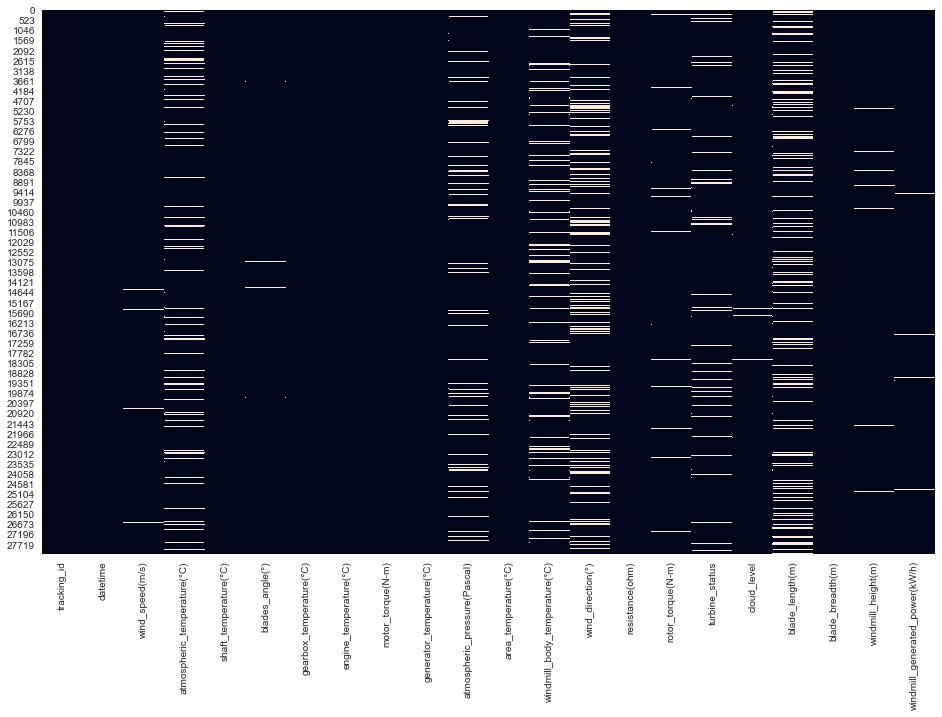

In [11]:
sns.heatmap(df.isnull(), cbar = False)

In [12]:
corr = df.corr()
plt.figure(figsize=(20,10))
mask = np.zeros_like(corr, dtype= bool)
plt.show()

<Figure size 1440x720 with 0 Axes>

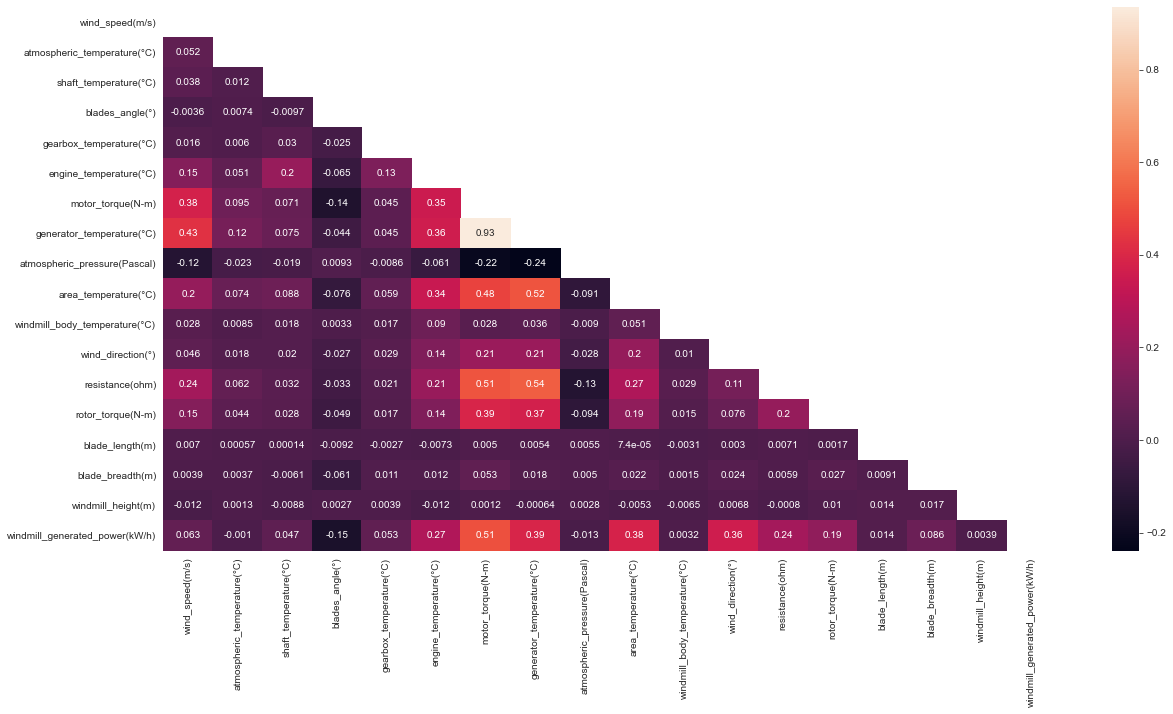

In [13]:
corr = df.corr()
plt.figure(figsize=(20,10))
mask = np.zeros_like(corr,dtype=np.bool)

## this line will remove the upper triangle ##
mask[np.triu_indices_from(mask)] = True
##############################################

sns.heatmap(corr,mask=mask,annot=True)
plt.show()

Each of those correlation types can exist in a spectrum represented by values from 0 to 1 where slightly or highly positive correlation features can be something like 0.5 or 0.7. If there is a strong and perfect positive correlation, then the result is represented by a correlation score value of 0.9 or 1.
If there is a strong negative correlation, it will be represented by a value of -1.

<h3>Multicollinearity</h3>is a phenomenon in which one independent variable is highly correlated with one or more of the other independent variables in a multiple regression equation. In other words, one independent variable can be linearly predicted from one or multiple other independent variables with a substantial degree of certainty.

In [14]:
# function to devide the categorical and numerical feature from the dataset

def getFeatures(df):
    num_features = df.select_dtypes(include = ['number'])
    cat_features = df.select_dtypes(include = ['object'])
    return num_features, cat_features

In [15]:
num_features, cat_features = getFeatures(df)

In [16]:
num_features

wind_speed(m/s)  atmospheric_temperature(°C)  shaft_temperature(°C)  \
0            94.820023                   -99.000000              41.723019   
1           241.832734                    27.764785             -99.000000   
2            95.484724                          NaN              41.855473   
3           238.819424                   -99.000000              45.443914   
4            10.722890                          NaN              41.981183   
...                ...                          ...                    ...   
28195        94.765699                    23.576793              45.399352   
28196        94.196738                    24.034329              42.068979   
28197        94.160463                    28.674296              45.004213   
28198        95.430377                    26.560254              48.032624   
28199        43.558352                    18.721231               9.220208   

       blades_angle(°)  gearbox_temperature(°C)  engine_temperature(°C)  \
0            -0.903423                82.410573               42.523015   
1           -99.000000                44.104919               46.258870   
2            12.652763                42.322098               42.878552   
3            15.115323                44.759643               47.282101   
4             1.715696               -17.616459               43.469852   
...                ...                      ...                     ...   
28195         5.377222                -1.085171               48.528248   
28196       -99.000000                44.285153               43.487939   
28197         9.550358                49.377706               44.042632   
28198         3.051389                81.443896               44.821365   
28199         2.593639                40.262279               40.901975   

       motor_torque(N-m)  generator_temperature(°C)  \
0            2563.124522                  76.665560   
1            2372.384119                  78.129803   
2            1657.169646                  67.654469   
3            2888.134079                  95.389974   
4             781.695419                  37.423065   
...                  ...                        ...   
28195        2791.600990                  90.898875   
28196        2207.882276                  72.244645   
28197        2801.657374                  94.814637   
28198        2760.647280                  90.144418   
28199        2015.977410                  69.043447   

       atmospheric_pressure(Pascal)  area_temperature(°C)  \
0                     103402.961872             26.897875   
1                      17030.904078             39.801469   
2                      16125.927107             36.116065   
3                      18689.732336             46.020045   
4                     114468.169007             34.572941   
...                             ...                   ...   
28195                  19428.725079             45.429230   
28196                  16596.485400             25.142681   
28197                  19083.881449             45.129442   
28198                  18360.785707             45.603927   
28199                -256507.547672             22.413407   

       windmill_body_temperature(°C)  wind_direction(°)  resistance(ohm)  \
0                                NaN         239.836388      2730.310605   
1                                NaN         337.944723      1780.207200   
2                          45.033197         227.850294      1666.049900   
3                          44.827154         492.081520      1964.502895   
4                         -99.000000         259.274601      1177.516152   
...                              ...                ...              ...   
28195                      44.242269         536.153413      1980.861921   
28196                      43.616412         354.239825      1712.840457   
28197                      43.576510         534.209913      1951.728713   
28198          

In [17]:
num_features.iloc[:]

wind_speed(m/s)  atmospheric_temperature(°C)  shaft_temperature(°C)  \
0            94.820023                   -99.000000              41.723019   
1           241.832734                    27.764785             -99.000000   
2            95.484724                          NaN              41.855473   
3           238.819424                   -99.000000              45.443914   
4            10.722890                          NaN              41.981183   
...                ...                          ...                    ...   
28195        94.765699                    23.576793              45.399352   
28196        94.196738                    24.034329              42.068979   
28197        94.160463                    28.674296              45.004213   
28198        95.430377                    26.560254              48.032624   
28199        43.558352                    18.721231               9.220208   

       blades_angle(°)  gearbox_temperature(°C)  engine_temperature(°C)  \
0            -0.903423                82.410573               42.523015   
1           -99.000000                44.104919               46.258870   
2            12.652763                42.322098               42.878552   
3            15.115323                44.759643               47.282101   
4             1.715696               -17.616459               43.469852   
...                ...                      ...                     ...   
28195         5.377222                -1.085171               48.528248   
28196       -99.000000                44.285153               43.487939   
28197         9.550358                49.377706               44.042632   
28198         3.051389                81.443896               44.821365   
28199         2.593639                40.262279               40.901975   

       motor_torque(N-m)  generator_temperature(°C)  \
0            2563.124522                  76.665560   
1            2372.384119                  78.129803   
2            1657.169646                  67.654469   
3            2888.134079                  95.389974   
4             781.695419                  37.423065   
...                  ...                        ...   
28195        2791.600990                  90.898875   
28196        2207.882276                  72.244645   
28197        2801.657374                  94.814637   
28198        2760.647280                  90.144418   
28199        2015.977410                  69.043447   

       atmospheric_pressure(Pascal)  area_temperature(°C)  \
0                     103402.961872             26.897875   
1                      17030.904078             39.801469   
2                      16125.927107             36.116065   
3                      18689.732336             46.020045   
4                     114468.169007             34.572941   
...                             ...                   ...   
28195                  19428.725079             45.429230   
28196                  16596.485400             25.142681   
28197                  19083.881449             45.129442   
28198                  18360.785707             45.603927   
28199                -256507.547672             22.413407   

       windmill_body_temperature(°C)  wind_direction(°)  resistance(ohm)  \
0                                NaN         239.836388      2730.310605   
1                                NaN         337.944723      1780.207200   
2                          45.033197         227.850294      1666.049900   
3                          44.827154         492.081520      1964.502895   
4                         -99.000000         259.274601      1177.516152   
...                              ...                ...              ...   
28195                      44.242269         536.153413      1980.861921   
28196                      43.616412         354.239825      1712.840457   
28197                      43.576510         534.209913      1951.728713   
28198          

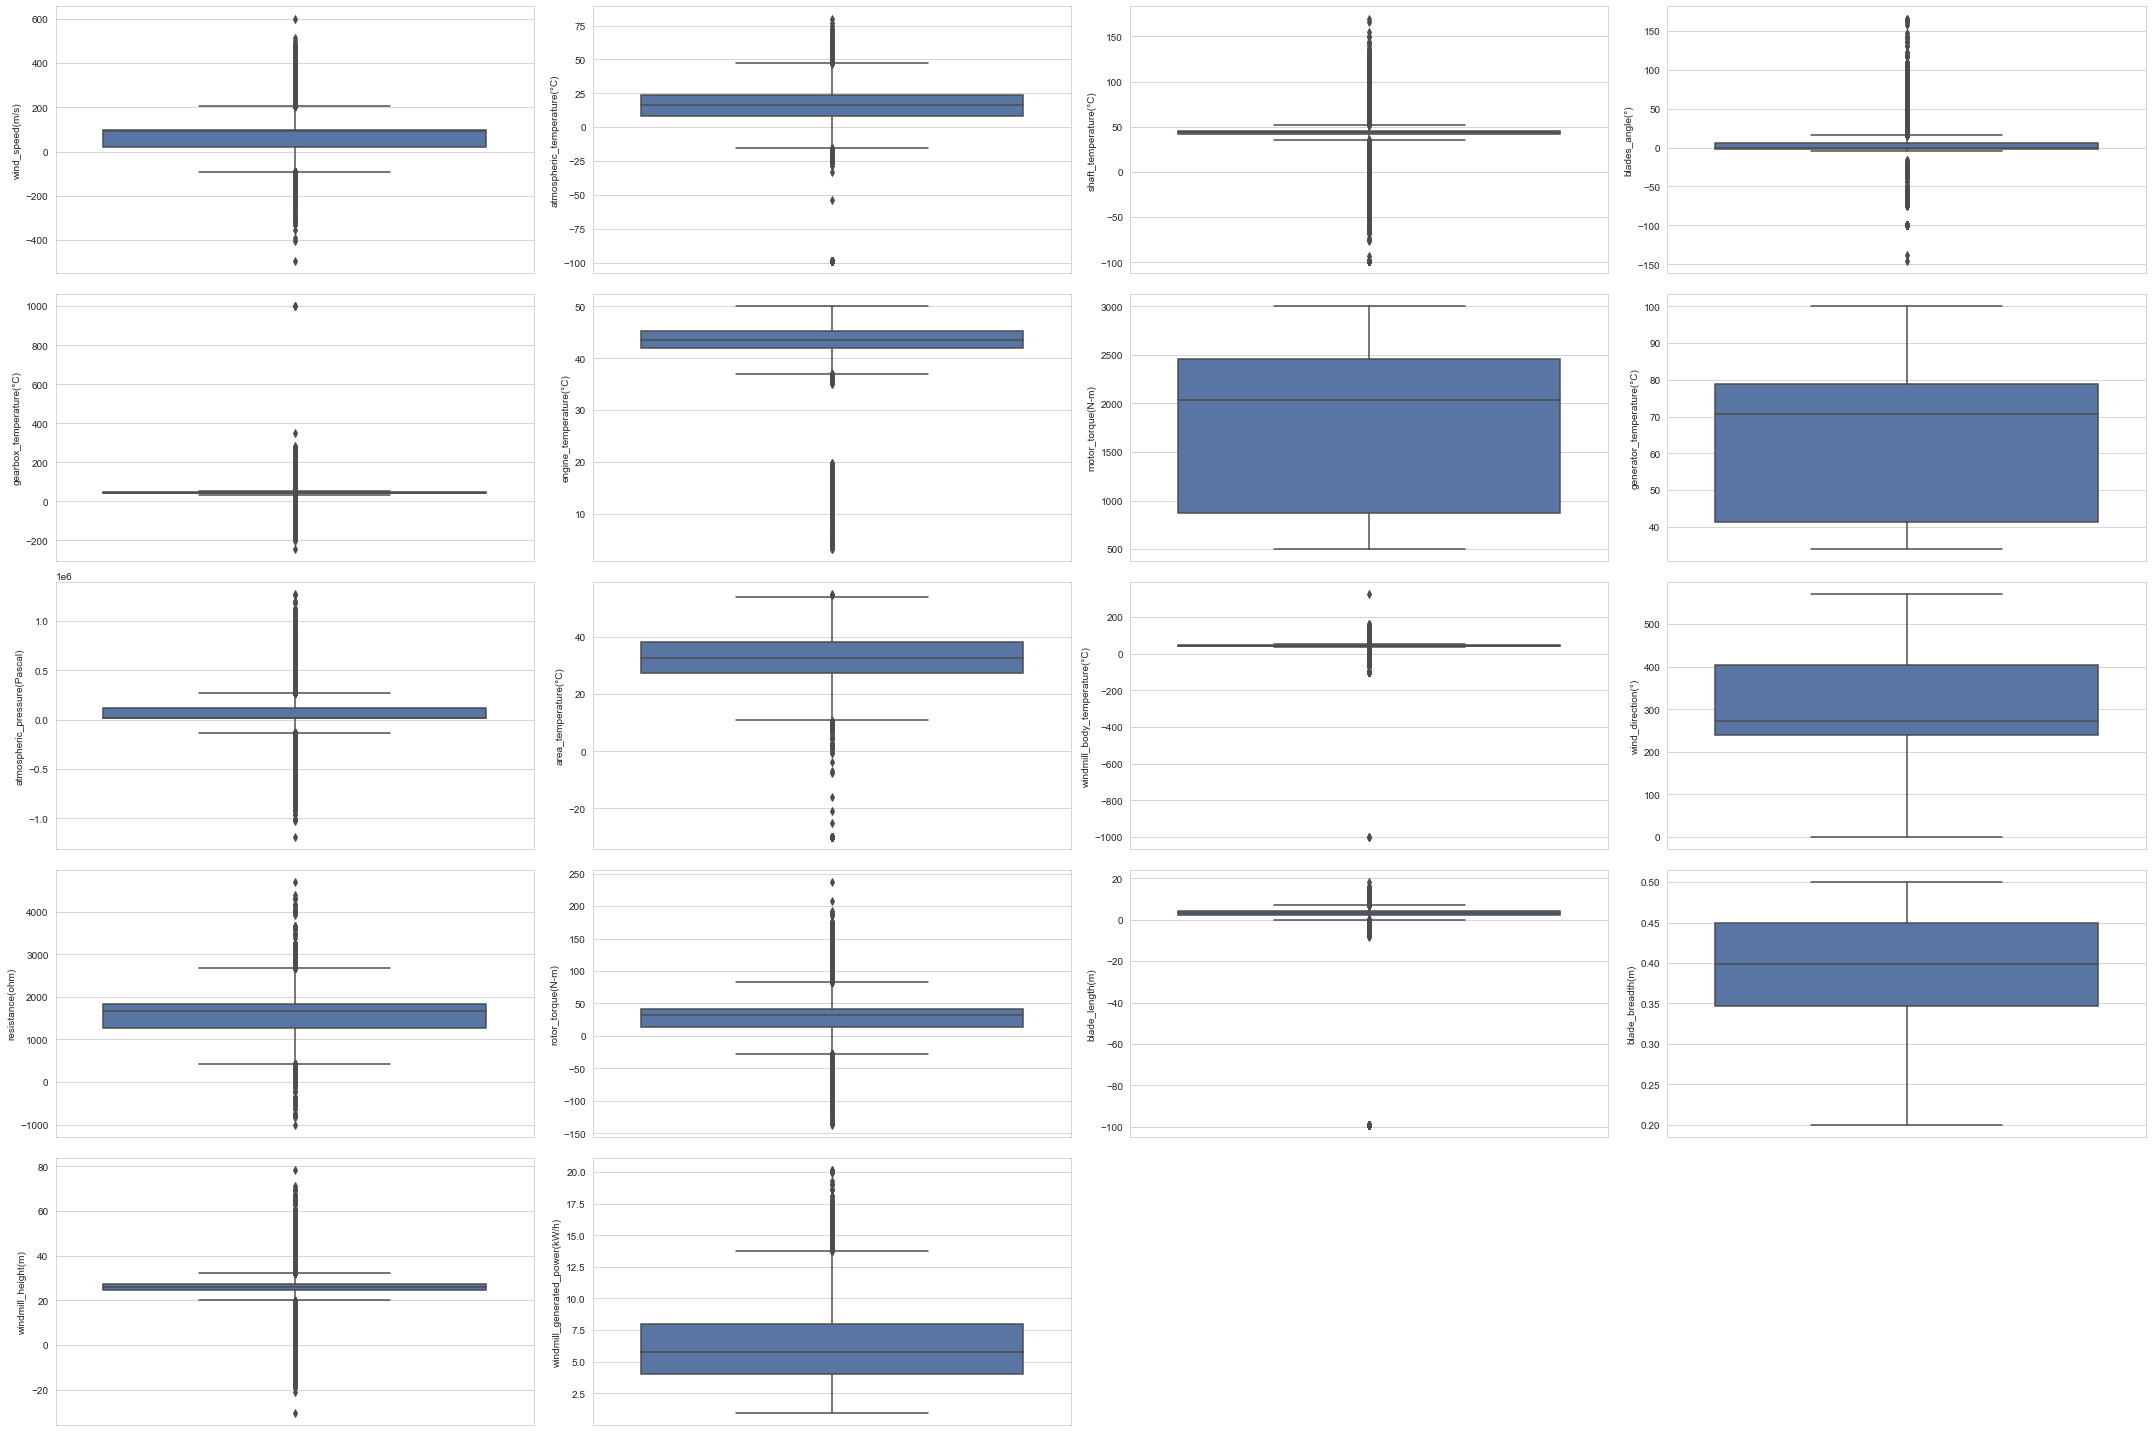

In [18]:
## Box plot of numerical features
figure1 = plt.figure(figsize= (30,20))

for i in range(len(num_features.columns)): 
    figure1.add_subplot(5,4,i+1) # adding the graphs into 30,20
    sns.boxplot(y = num_features.iloc[:,i]) # y= assigning into variable will save into the warning
plt.tight_layout() # 
plt.show()

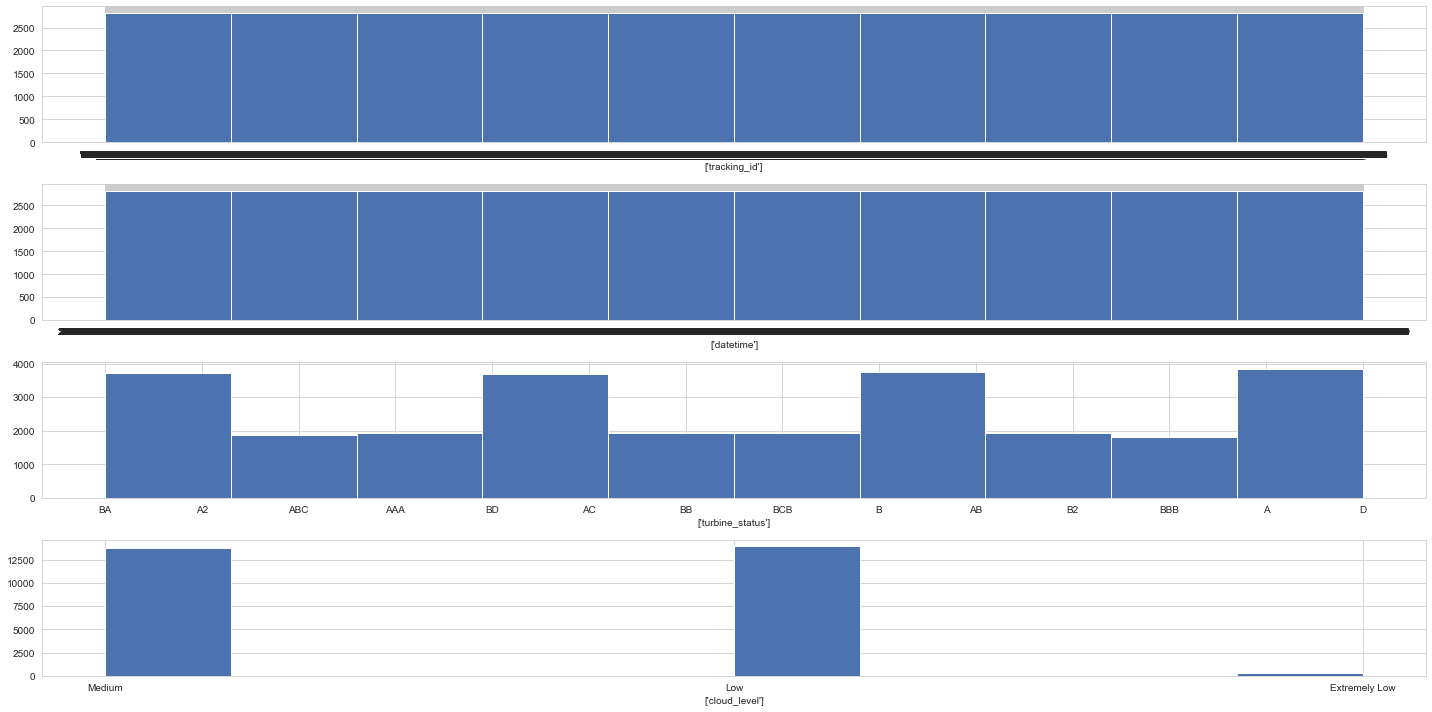

In [19]:
fig = plt.figure(figsize=(20,10))

for i in range(len(cat_features.columns)):
    fig.add_subplot(4,1,i+1)
    cat_features.iloc[:,i].hist()
    plt.xlabel([cat_features.columns[i]])
plt.tight_layout()
plt.show()

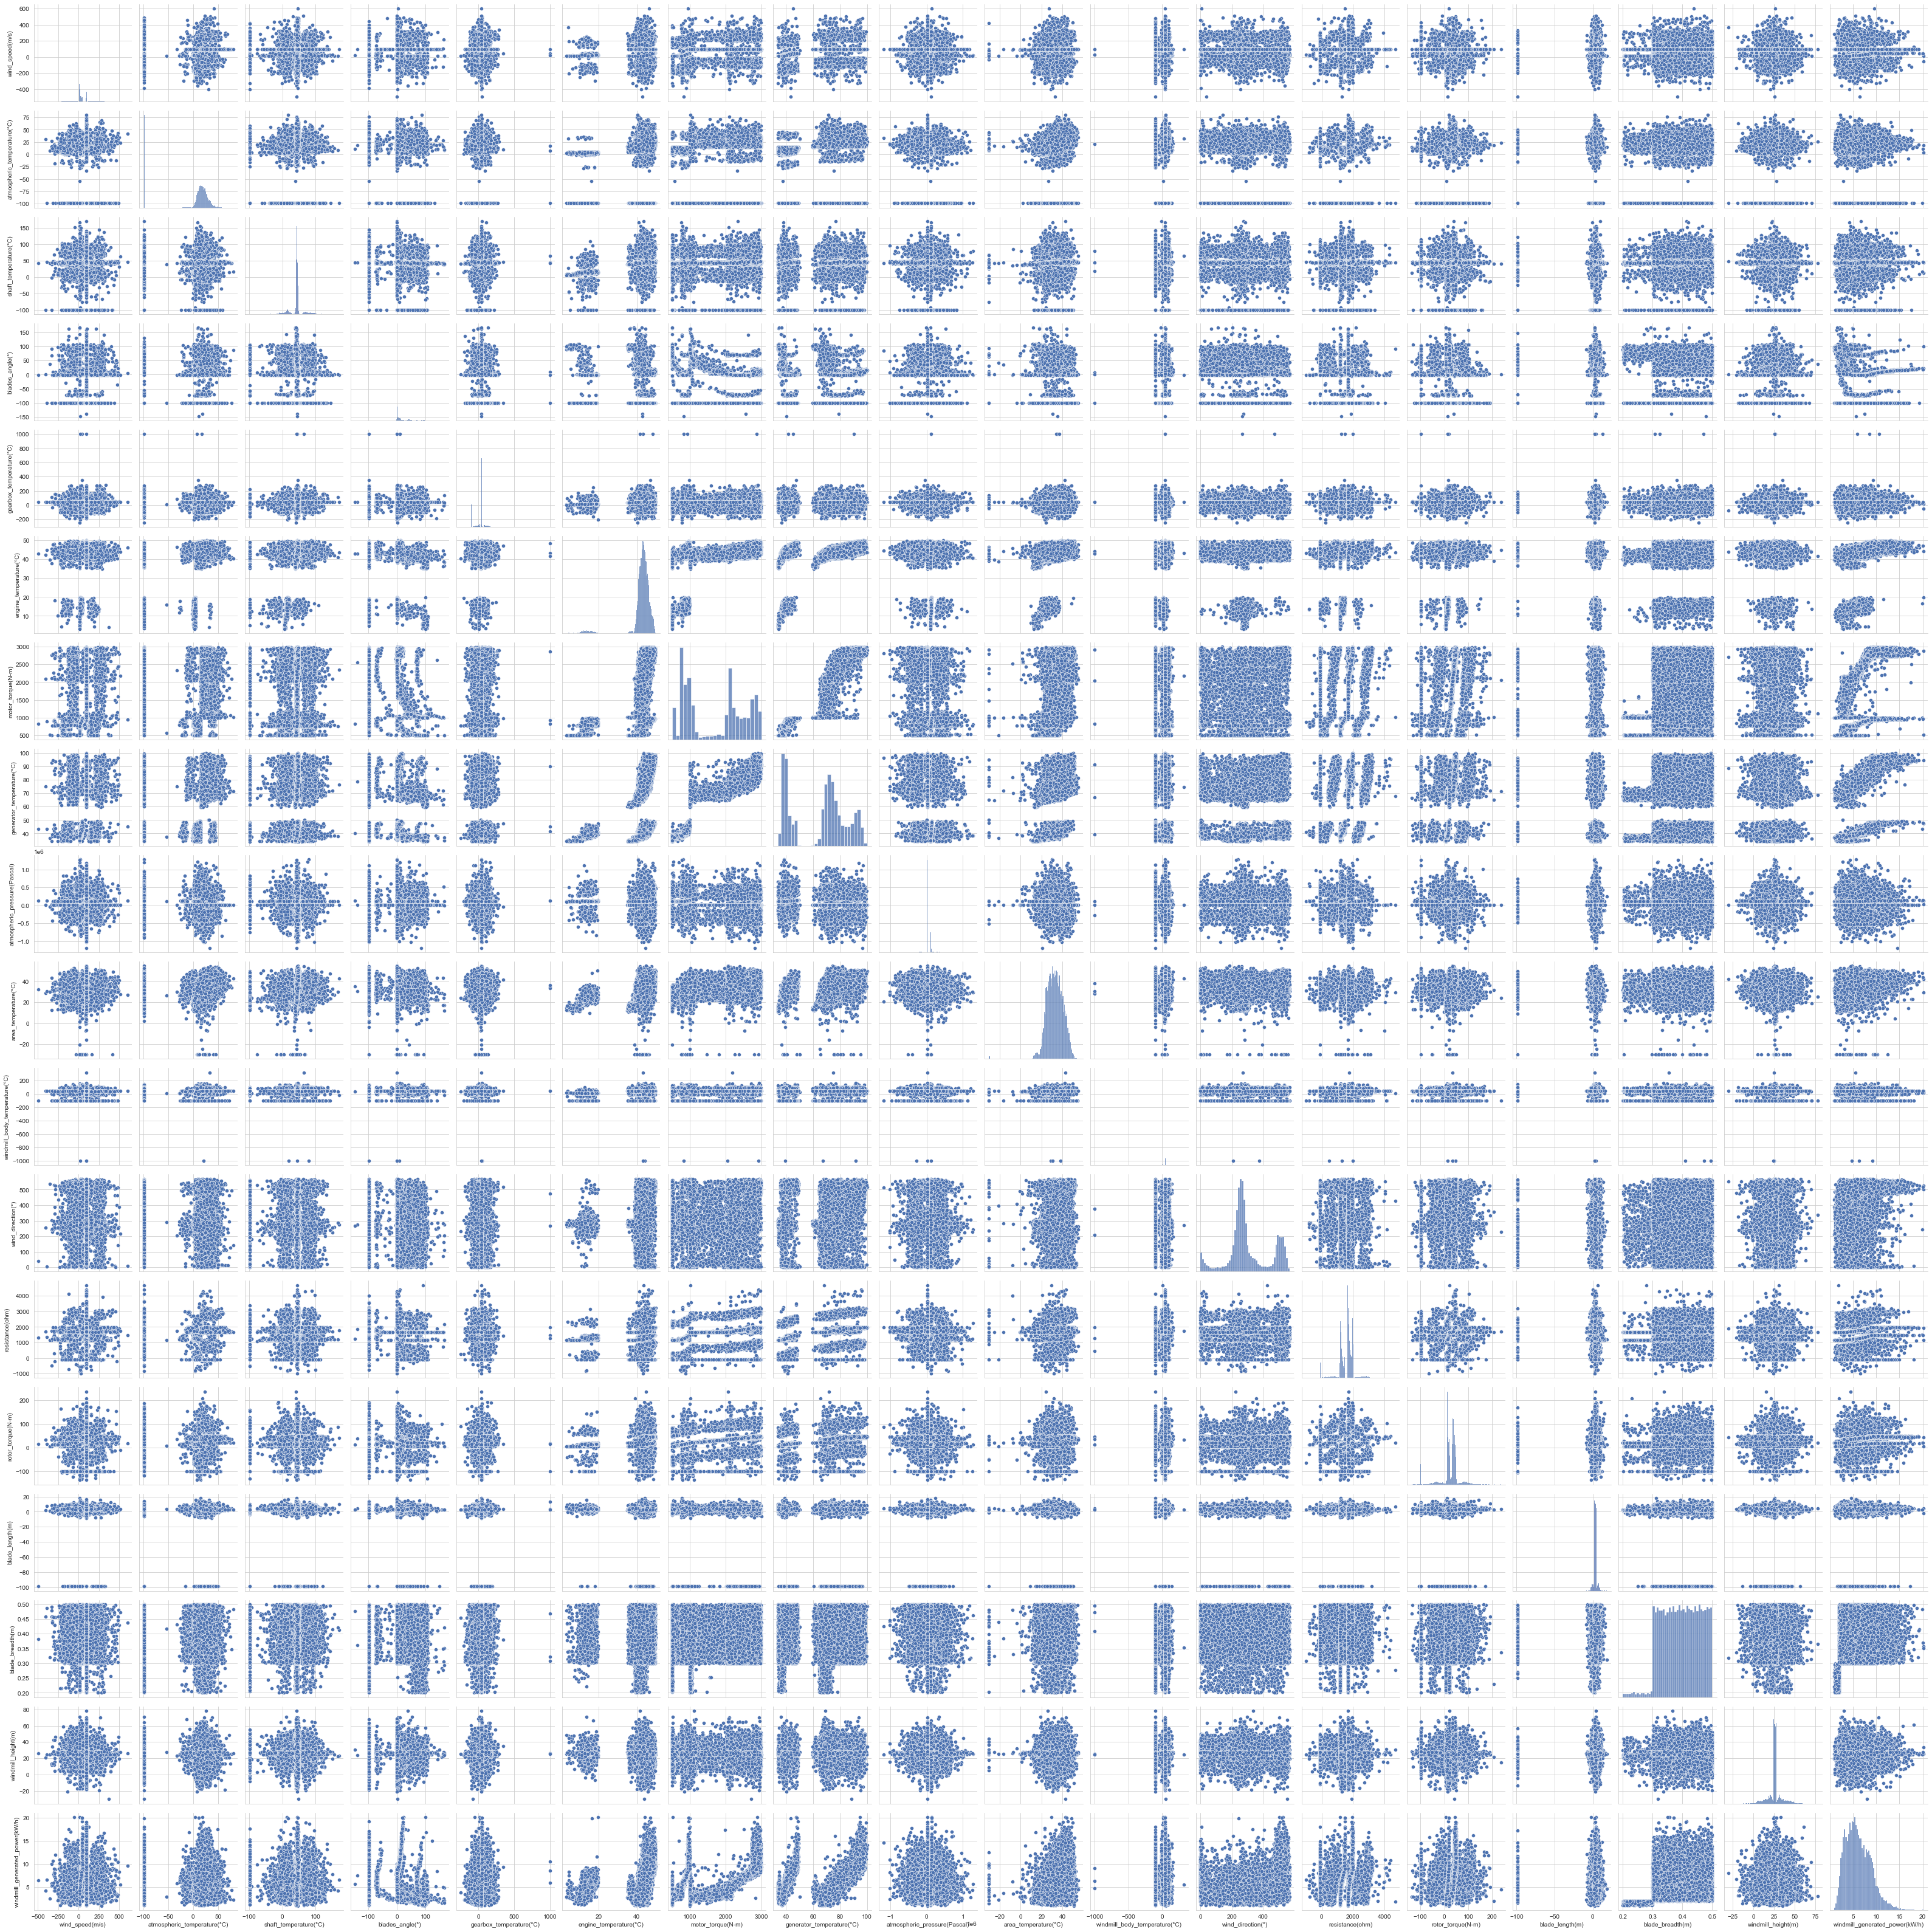

In [20]:
sns.pairplot(df)
plt.show()

In [21]:
df.columns

Index(['tracking_id', 'datetime', 'wind_speed(m/s)',
       'atmospheric_temperature(°C)', 'shaft_temperature(°C)',
       'blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)',
       'motor_torque(N-m)', 'generator_temperature(°C)',
       'atmospheric_pressure(Pascal)', 'area_temperature(°C)',
       'windmill_body_temperature(°C)', 'wind_direction(°)', 'resistance(ohm)',
       'rotor_torque(N-m)', 'turbine_status', 'cloud_level', 'blade_length(m)',
       'blade_breadth(m)', 'windmill_height(m)',
       'windmill_generated_power(kW/h)'],
      dtype='object')

In [22]:
# have to chek is there any alternative way to do so.

skew_features = num_features.apply(lambda x :x.skew()).sort_values(ascending=True)
skew_features

blade_length(m)                  -8.608358
engine_temperature(°C)           -3.944776
shaft_temperature(°C)            -2.525168
windmill_body_temperature(°C)    -2.236832
atmospheric_temperature(°C)      -1.674895
rotor_torque(N-m)                -1.030947
resistance(ohm)                  -0.697809
blades_angle(°)                  -0.652122
area_temperature(°C)             -0.625424
blade_breadth(m)                 -0.193401
generator_temperature(°C)        -0.190809
windmill_height(m)               -0.113280
wind_speed(m/s)                  -0.060477
motor_torque(N-m)                 0.034258
atmospheric_pressure(Pascal)      0.056671
wind_direction(°)                 0.171942
windmill_generated_power(kW/h)    0.688935
gearbox_temperature(°C)           0.886846
dtype: float64

In [23]:
# copying dataframe to do some changes

df_copy = df.copy()

In [24]:
df_copy.head()

tracking_id             datetime  wind_speed(m/s)  \
0    WM_33725  2019-08-04 14:33:20        94.820023   
1      WM_698  2018-11-05 10:13:20       241.832734   
2    WM_39146  2019-09-14 14:03:20        95.484724   
3     WM_6757  2018-12-25 15:33:20       238.819424   
4    WM_21521  2019-05-04 03:13:20        10.722890   

   atmospheric_temperature(°C)  shaft_temperature(°C)  blades_angle(°)  \
0                   -99.000000              41.723019        -0.903423   
1                    27.764785             -99.000000       -99.000000   
2                          NaN              41.855473        12.652763   
3                   -99.000000              45.443914        15.115323   
4                          NaN              41.981183         1.715696   

   gearbox_temperature(°C)  engine_temperature(°C)  motor_torque(N-m)  \
0                82.410573               42.523015        2563.124522   
1                44.104919               46.258870        2372.384119   
2                42.322098               42.878552        1657.169646   
3                44.759643               47.282101        2888.134079   
4               -17.616459               43.469852         781.695419   

   generator_temperature(°C)  ...  windmill_body_temperature(°C)  \
0                  76.665560  ...                            NaN   
1                  78.129803  ...                            NaN   
2                  67.654469  ...                      45.033197   
3                  95.389974  ...                      44.827154   
4                  37.423065  ...                     -99.000000   

   wind_direction(°)  resistance(ohm)  rotor_torque(N-m)  turbine_status  \
0         239.836388      2730.310605          42.084666              BA   
1         337.944723      1780.207200         107.888643              A2   
2         227.850294      1666.049900         -42.931459             ABC   
3         492.081520      1964.502895          42.744596             ABC   
4         259.274601      1177.516152          13.387289             AAA   

   cloud_level blade_length(m) blade_breadth(m)  windmill_height(m)  \
0       Medium        2.217542         0.314065           24.281689   
1       Medium        4.210346         0.448494           27.262139   
2       Medium        2.719475         0.302321           27.366127   
3          NaN        4.857385         0.367140           24.287767   
4       Medium             NaN         0.453374           27.971650   

   windmill_generated_power(kW/h)  
0                        6.766521  
1                        5.966275  
2                        2.874342  
3                       14.851089  
4                        3.519074  

[5 rows x 22 columns]

<AxesSubplot:ylabel='wind_speed(m/s)'>

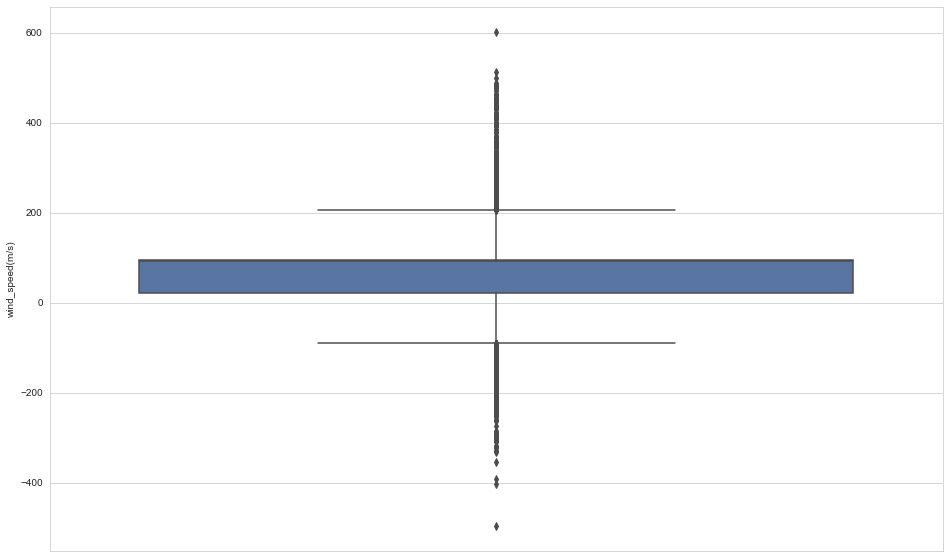

In [25]:
sns.boxplot(y='wind_speed(m/s)', data =df)

<AxesSubplot:xlabel='atmospheric_temperature(°C)', ylabel='windmill_generated_power(kW/h)'>

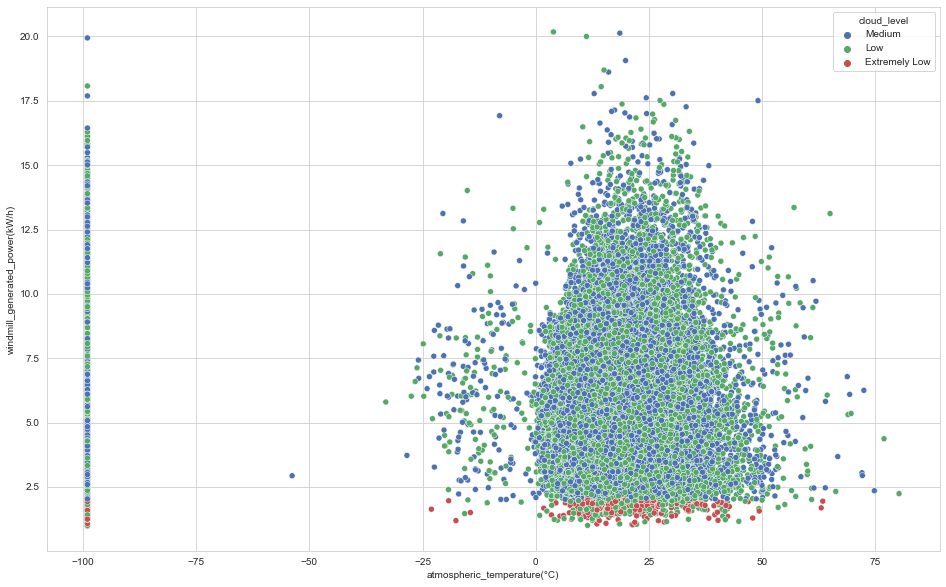

In [26]:
sns.scatterplot(x='atmospheric_temperature(°C)',y='windmill_generated_power(kW/h)',hue='cloud_level',data=df)

## Data Prepration

In [27]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   generator_temperature(°C)       28188 non-null  float64
 10  atmospheric_pressure(Pascal)    25493 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

In [28]:
df_copy.describe()

wind_speed(m/s)  atmospheric_temperature(°C)  shaft_temperature(°C)  \
count     27927.000000                 24750.000000           28198.000000   
mean         69.037071                     0.383727              40.085387   
std          76.275645                    44.278534              27.204430   
min        -496.211029                   -99.000000             -99.000000   
25%          20.883502                     7.948900              41.633238   
50%          93.302129                    16.102410              43.686082   
75%          95.268058                    23.687285              45.673685   
max         601.455670                    80.217444             169.820455   

       blades_angle(°)  gearbox_temperature(°C)  engine_temperature(°C)  \
count     27984.000000             28199.000000            28188.000000   
mean         -9.654038                41.027755               42.614239   
std          47.918161                43.663605                6.124546   
min        -146.259543              -244.974098                3.167151   
25%          -1.197652                40.557952               41.911365   
50%          -0.495608                43.221735               43.525297   
75%           5.495030                45.879425               45.174246   
max         165.932123               999.000000               50.000000   

       motor_torque(N-m)  generator_temperature(°C)  \
count       28176.000000               28188.000000   
mean         1710.819803                  65.027857   
std           827.205537                  19.816499   
min           500.000000                  33.893779   
25%           870.340239                  41.198509   
50%          2031.849540                  70.729533   
75%          2462.585729                  78.945849   
max          3000.000000                 100.000000   

       atmospheric_pressure(Pascal)  area_temperature(°C)  \
count                  2.549300e+04          28200.000000   
mean                   5.318506e+04             32.735091   
std                    1.875036e+05              7.703391   
min                   -1.188624e+06            -30.000000   
25%                    1.679492e+04             27.311644   
50%                    1.819113e+04             32.605195   
75%                    1.181133e+05             38.232387   
max                    1.272552e+06             55.000000   

       windmill_body_temperature(°C)  wind_direction(°)  resistance(ohm)  \
count                   25837.000000       23097.000000     28199.000000   
mean                       20.799761         306.888883      1575.560011   
std                        54.356431         134.055900       483.326394   
min                      -999.000000           0.000000     -1005.222988   
25%                        40.448386         238.627752      1268.134043   
50%                        42.786832         271.427656      1678.238404   
75%                        44.494543         404.153517      1829.054007   
max                       323.000000         569.966479      4693.481933   

       rotor_torque(N-m)  blade_length(m)  blade_breadth(m)  \
count       27628.000000     23107.000000      28200.000000   
mean           25.849894         2.254034          0.397249   
std            32.423943        11.275602          0.061158   
min          -136.732217       -99.000000          0.200111   
25%            13.722808         2.544859          0.347445   
50%            32.977192         3.453333          0.398591   
75%            41.550520         4.357862          0.449354   
max           236.883264        18.209800          0.499975   

       windmill_height(m)  windmill_generated_power(kW/h)  
count        27657.000000                    27993.000000  
mean            25.887052                        6.130529  
std              7.773609                        2.697520  
min            -30.295253                        0.962305  
25%             24.447658    

In [29]:
df_copy['cloud_level'].nunique()


3

In [30]:
df['turbine_status'].nunique()

14

In [31]:
# we will replace the null values of integer/float category to the mean of the features

df_copy['wind_speed(m/s)'].fillna(df_copy['wind_speed(m/s)'].mean(), inplace = True)
df_copy['atmospheric_temperature(°C)'].fillna(df_copy['atmospheric_temperature(°C)'].mean(), inplace = True)
df_copy['shaft_temperature(°C)'].fillna(df_copy['shaft_temperature(°C)'].mean(), inplace = True)
df_copy['blades_angle(°)'].fillna(df_copy['blades_angle(°)'].mean(), inplace = True)
df_copy['gearbox_temperature(°C)'].fillna(df_copy['gearbox_temperature(°C)'].mean(), inplace = True)
df_copy['engine_temperature(°C)'].fillna(df_copy['engine_temperature(°C)'].mean(), inplace = True)
df_copy['motor_torque(N-m)'].fillna(df_copy['motor_torque(N-m)'].mean(), inplace = True)

# we didn't found anything different in his distribution with test data so we will keep it.
df_copy['generator_temperature(°C)'].fillna(df_copy['generator_temperature(°C)'].mean(), inplace = True)

df_copy['atmospheric_pressure(Pascal)'].fillna(df_copy['atmospheric_pressure(Pascal)'].mean(), inplace = True)
df_copy['area_temperature(°C)'].fillna(df_copy['area_temperature(°C)'].mean(), inplace = True)

# This feature "windmill_body_temperature(°C)" doesn't have same distribution in training and testing set
# and it is not much correlated with targetFeature as well. So, we concluded to drop it in the end.
df_copy['windmill_body_temperature(°C)'].fillna(df_copy['windmill_body_temperature(°C)'].mean(), inplace = True)

df_copy['wind_direction(°)'].fillna(df_copy['wind_direction(°)'].mean(), inplace = True)

# we didn't found anything different in his distribution with test data so we will keep it.
df_copy['resistance(ohm)'].fillna(df_copy['resistance(ohm)'].mean(), inplace = True)

df_copy['rotor_torque(N-m)'].fillna(df_copy['rotor_torque(N-m)'].mean(), inplace = True)
df_copy['blade_length(m)'].fillna(df_copy['blade_length(m)'].mean(), inplace = True)
df_copy['blade_breadth(m)'].fillna(df_copy['blade_breadth(m)'].mean(), inplace = True)
df_copy['windmill_height(m)'].fillna(df_copy['windmill_height(m)'].mean(), inplace = True)

# We will replace the null values of object category to the mode of the features
df_copy['cloud_level'].fillna(df_copy['cloud_level'].mode()[0], inplace= True)
df_copy['turbine_status'].fillna(df_copy['turbine_status'].mode()[0], inplace = True)

In [32]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 28200 non-null  float64
 3   atmospheric_temperature(°C)     28200 non-null  float64
 4   shaft_temperature(°C)           28200 non-null  float64
 5   blades_angle(°)                 28200 non-null  float64
 6   gearbox_temperature(°C)         28200 non-null  float64
 7   engine_temperature(°C)          28200 non-null  float64
 8   motor_torque(N-m)               28200 non-null  float64
 9   generator_temperature(°C)       28200 non-null  float64
 10  atmospheric_pressure(Pascal)    28200 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

In [33]:
df_copy.dropna(axis= 0, how = 'any', inplace= True)

In [34]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27993 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     27993 non-null  object 
 1   datetime                        27993 non-null  object 
 2   wind_speed(m/s)                 27993 non-null  float64
 3   atmospheric_temperature(°C)     27993 non-null  float64
 4   shaft_temperature(°C)           27993 non-null  float64
 5   blades_angle(°)                 27993 non-null  float64
 6   gearbox_temperature(°C)         27993 non-null  float64
 7   engine_temperature(°C)          27993 non-null  float64
 8   motor_torque(N-m)               27993 non-null  float64
 9   generator_temperature(°C)       27993 non-null  float64
 10  atmospheric_pressure(Pascal)    27993 non-null  float64
 11  area_temperature(°C)            27993 non-null  float64
 12  windmill_body_temperature(°C)   

In [35]:
df_copy['cloud_level'].unique()

array(['Medium', 'Low', 'Extremely Low'], dtype=object)

In [36]:
# Changing the categorical values with unique value

df_copy['cloud_level'].replace(['Extremely Low', 'Low', 'Medium'],[0,1,2], inplace = True)

In [37]:
df_copy['cloud_level'].unique()

array([2, 1, 0])

In [38]:
df_copy['turbine_status'].value_counts()

BB     3677
AAA    1925
BCB    1920
B2     1918
A      1914
D      1907
B      1870
AB     1855
ABC    1855
AC     1841
A2     1840
BA     1835
BD     1830
BBB    1806
Name: turbine_status, dtype: int64

In [39]:
######### using that set of code will give you features_values as a column##########
dum = ['turbine_status']
df_dum = pd.get_dummies(df_copy[dum])
###################################################################################

In [40]:
df_dum

turbine_status_A  turbine_status_A2  turbine_status_AAA  \
0                     0                  0                   0   
1                     0                  1                   0   
2                     0                  0                   0   
3                     0                  0                   0   
4                     0                  0                   1   
...                 ...                ...                 ...   
28195                 0                  0                   0   
28196                 0                  0                   0   
28197                 0                  0                   0   
28198                 0                  0                   0   
28199                 0                  0                   0   

       turbine_status_AB  turbine_status_ABC  turbine_status_AC  \
0                      0                   0                  0   
1                      0                   0                  0   
2                      0                   1                  0   
3                      0                   1                  0   
4                      0                   0                  0   
...                  ...                 ...                ...   
28195                  0                   0                  0   
28196                  0                   0                  0   
28197                  0                   0                  0   
28198                  0                   0                  0   
28199                  0                   0                  0   

       turbine_status_B  turbine_status_B2  turbine_status_BA  \
0                     0                  0                  1   
1                     0                  0                  0   
2                     0                  0                  0   
3                     0                  0                  0   
4                     0                  0                  0   
...                 ...                ...                ...   
28195                 0                  0                  0   
28196                 0                  0                  0   
28197                 0                  0                  0   
28198                 0                  0                  0   
28199                 0                  0                  0   

       turbine_status_BB  turbine_status_BBB  turbine_status_BCB  \
0                      0                   0                   0   
1                      0                   0                   0   
2                      0                   0                   0   
3                      0                   0                   0   
4                      0                   0                   0   
...                  ...                 ...                 ...   
28195                  1                   0                   0   
28196                  1                   0                   0   
28197                  0                   0                   0   
28198                  0                   0                   1   
28199                  0                   1                   0   

       turbine_status_BD  turbine_status_D  
0                      0                 0  
1                      0                 0  
2                      0                 0  
3                      0                 0  
4                      0                 0  
...                  ...               ...  
28195                  0                 0  
28196                  0                 0  
28197                  0                 1  
28198                  0                 0  
28199                  0                 0  

[27993 rows x 14 columns]

In [41]:
# adding the dummies features in the data set
df_copy = pd.concat([df_copy,df_dum], axis =1)

In [42]:
df_copy['datetime'].head(5)

0    2019-08-04 14:33:20
1    2018-11-05 10:13:20
2    2019-09-14 14:03:20
3    2018-12-25 15:33:20
4    2019-05-04 03:13:20
Name: datetime, dtype: object

In [43]:
df_copy['datetime'] = pd.to_datetime(df_copy['datetime'])

In [44]:
df_copy['datetime'].head()

0   2019-08-04 14:33:20
1   2018-11-05 10:13:20
2   2019-09-14 14:03:20
3   2018-12-25 15:33:20
4   2019-05-04 03:13:20
Name: datetime, dtype: datetime64[ns]

In [45]:
df_copy['Dmonth'] = df_copy['datetime'].dt.month
df_copy['Dday'] = df_copy['datetime'].dt.day
df_copy['DdayOfWeek'] = df_copy['datetime'].dt.dayofweek

In [46]:
df_copy.columns

Index(['tracking_id', 'datetime', 'wind_speed(m/s)',
       'atmospheric_temperature(°C)', 'shaft_temperature(°C)',
       'blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)',
       'motor_torque(N-m)', 'generator_temperature(°C)',
       'atmospheric_pressure(Pascal)', 'area_temperature(°C)',
       'windmill_body_temperature(°C)', 'wind_direction(°)', 'resistance(ohm)',
       'rotor_torque(N-m)', 'turbine_status', 'cloud_level', 'blade_length(m)',
       'blade_breadth(m)', 'windmill_height(m)',
       'windmill_generated_power(kW/h)', 'turbine_status_A',
       'turbine_status_A2', 'turbine_status_AAA', 'turbine_status_AB',
       'turbine_status_ABC', 'turbine_status_AC', 'turbine_status_B',
       'turbine_status_B2', 'turbine_status_BA', 'turbine_status_BB',
       'turbine_status_BBB', 'turbine_status_BCB', 'turbine_status_BD',
       'turbine_status_D', 'Dmonth', 'Dday', 'DdayOfWeek'],
      dtype='object')

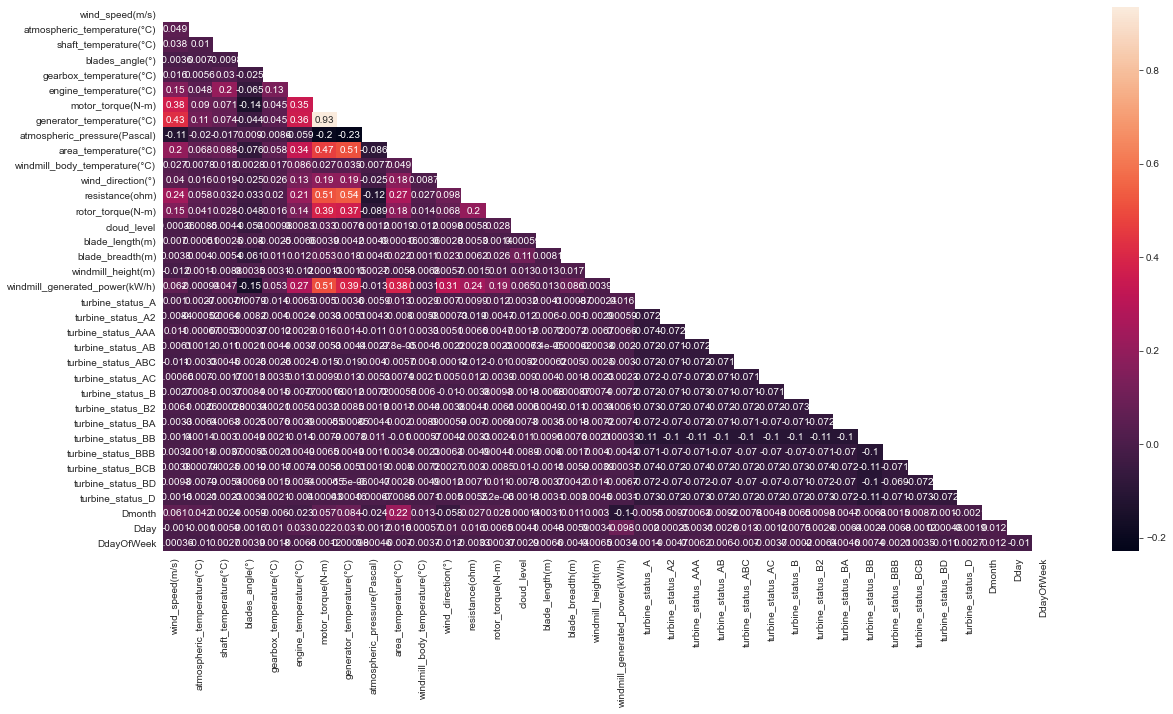

In [47]:
corr = df_copy.corr()
plt.figure(figsize=(20,10))
mask = np.zeros_like(corr,dtype=np.bool)

## this line will remove the upper triangle##
mask[np.triu_indices_from(mask)] = True
#############################################

sns.heatmap(corr,mask=mask,annot=True)
plt.show()

## Ignore Warnings

In [48]:
import warnings
warnings.filterwarnings('ignore')

## Data Modelling

In [49]:
X = df_copy.drop(['tracking_id','datetime','windmill_generated_power(kW/h)','turbine_status'],axis =1)
Y = df_copy['windmill_generated_power(kW/h)']

In [50]:
print(X.shape, Y.shape)

(27993, 35) (27993,)


In [51]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaler.fit_transform(X, y= None)

array([[ 2.11450138e-02, -5.09897918e+00, -4.85413487e-01, ...,
         3.33333333e-01, -7.33333333e-01,  7.50000000e-01],
       [ 2.00717899e+00,  6.13409070e-01, -3.53195839e+01, ...,
         8.33333333e-01, -6.66666667e-01, -7.50000000e-01],
       [ 3.01246364e-02, -6.20460672e-01, -4.52626162e-01, ...,
         5.00000000e-01, -6.66666667e-02,  5.00000000e-01],
       ...,
       [ 1.22348428e-02,  6.54394265e-01,  3.26803886e-01, ...,
         1.00000000e+00, -2.00000000e-01, -2.50000000e-01],
       [ 2.93904469e-02,  5.59129405e-01,  1.07644804e+00, ...,
        -6.66666667e-01, -8.00000000e-01,  7.50000000e-01],
       [-6.71362595e-01,  2.05880345e-01, -8.53106558e+00, ...,
         1.66666667e-01,  1.00000000e+00, -5.00000000e-01]])

In [52]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size= 0.8, random_state= 42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(22394, 35) (22394,)
(5599, 35) (5599,)


## sklearn.linear_model

#### Linear Regrression

In [53]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(x_train,y_train)

y_train_pred = lr.predict(x_train)

print(r2_score(y_true=y_train ,y_pred=y_train_pred))

0.4471739971786224


#### Ridge Regression

In [54]:
from sklearn.linear_model import RidgeCV

ridge_model = RidgeCV(scoring = "r2", alphas = [0.0001,0.0005,0.001,0.005,0.01,0.1,1.0,10], cv=5)
ridge_model.fit(x_train, y_train)

y_train_pred = ridge_model.predict(x_train)

print(r2_score(y_true = y_train, y_pred= y_train_pred))

0.4471738541435797


#### Lasso Regression

In [55]:
from sklearn.linear_model import LassoCV

lasso_Model = LassoCV(alphas= [0.0001,0.0005,0.001,0.005,0.01,0.1,1.0,10], cv=5)
lasso_Model.fit(x_train,y_train)

y_train_pred = lasso_Model.predict(x_train)

print(r2_score(y_true= y_train, y_pred= y_train_pred))

0.44711429631553345


#### ElasticNet

In [56]:
from sklearn.linear_model import ElasticNetCV

elasticNet_model = ElasticNetCV(l1_ratio= [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
                               alphas = [1, 0.1, 0.01, 0.001, 0.0005], cv=5)
elasticNet_model.fit(x_train,y_train)

y_train_pred = elasticNet_model.predict(x_train)

print(r2_score(y_true= y_train, y_pred= y_train_pred))

0.44711429631553345


## sklearn.ensemble

#### ExtraTreesRegressor

In [57]:
from sklearn.ensemble import ExtraTreesRegressor

extraTreeRegressor_model = ExtraTreesRegressor(criterion= 'mse', random_state= 0, n_jobs= -1,
                                               min_samples_leaf= 1, max_depth= 20,
                                               min_samples_split=3, n_estimators= 1000)

extraTreeRegressor_model.fit(x_train,y_train)

y_train_pred = extraTreeRegressor_model.predict(x_train)

print(r2_score(y_true= y_train, y_pred= y_train_pred))

0.9976778029921619


#### RandomForestRegressor

In [58]:
from sklearn.ensemble import RandomForestRegressor

randomForest_model = RandomForestRegressor()
randomForest_model.fit(x_train, y_train)

y_train_pred = randomForest_model.predict(x_train)

print(r2_score(y_train, y_train_pred))

0.9946473343643285


#### GradientBoostingRegressor

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

GradientBooster_model = GradientBoostingRegressor(criterion='mse',random_state=0,max_depth=5,
                                                  n_estimators=500,min_samples_split=2,min_samples_leaf=2)
GradientBooster_model.fit(x_train, y_train)

y_train_pred = GradientBooster_model.predict(x_train)
print(r2_score(y_train, y_train_pred))

0.9894752454113639


#### XGBRegressor

In [60]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=500,max_depth=5,booster='gbtree',n_jobs=-1,
                         learning_rate=0.1,reg_lambda=0.01,reg_alpha=0.3)
xgb_model.fit(x_train, y_train)
y_train_pred = xgb_model.predict(x_train)

print(r2_score(y_train, y_train_pred))

0.9902560363414444
